## Data Visualization Course | VNU-HCM University of Science.
### LAP02 - Working with time-series data
#### **STEP 04 - Example - DATA MODELING AND EVALUATION**

In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

In [2]:
from Libraries import *
from Shared_Functions import *

**Đọc dữ liệu từ file đã được xử lý**

In [3]:
dataset_source_path = getGranDir() / 'Dataset'
processed_dataset_path = dataset_source_path / 'google_processed.csv'
df = getDataFrame(processed_dataset_path)

In [4]:
#TEST
df.head(10)

,Date,High,Low,Open,Close,Volume,Adj Close
0,2004-08-19,51.835709,47.800831,49.813290,49.982655,44871361.0,49.982655
1,2004-08-20,54.336334,50.062355,50.316402,53.952770,22942874.0,53.952770
2,2004-08-23,56.528118,54.321388,55.168217,54.495735,18342897.0,54.495735
3,2004-08-24,55.591629,51.591621,55.412300,52.239197,15319808.0,52.239197
4,2004-08-25,53.798351,51.746044,52.284027,52.802086,9232276.0,52.802086
5,2004-08-26,53.773445,52.134586,52.279045,53.753517,7128620.0,53.753517
6,2004-08-27,54.107193,52.647663,53.848164,52.876804,6241307.0,52.876804
7,2004-08-30,52.548038,50.814533,52.443428,50.814533,5221498.0,50.814533
8,2004-08-31,51.661362,50.889256,50.958992,50.993862,4941252.0,50.993862
9,2004-09-01,51.292744,49.648903,51.158245,49.937820,9181687.0,49.937820


**Nhận xét:** qua quá trình pre-proccessing trước đó thì ta nhận thấy tập dữ liệu đã được xử lý hoàn thiện. Khi này ta chỉ cần thực hiện bước tiếp sau khi đọc lại tập dữ liệu là thay đổi kiểu dữ liệu cho các cột sao cho chính xác.

In [5]:
df = changeDataType(df)

In [6]:
#TEST
df.dtypes

Date         datetime64[ns]
High                float64
Low                 float64
Open                float64
Close               float64
Volume              float64
Adj Close           float64
dtype: object

---

## **Data Modeling**

**Mô tả:** Mô hình dự đoán giá cổ phiếu bằng thuật toán hồi quy tuyến tính - ordinary least squares regression.

### **Vì sao hồi quy tuyến tính (OLS) phù hợp để tính toán và dự đoán giá chứng khoán?**

Hồi quy tuyến tính dựa trên mô hình hóa mối quan hệ giữa một biến mục tiêu (giá chứng khoán, trong trường hợp này là `Adj Close`) và một hoặc nhiều biến độc lập (các đặc trưng như `Open`, `High`, `Low`, `Volume`). Ordinary Least Squares (OLS) là phương pháp phổ biến nhất để ước lượng tham số của hồi quy tuyến tính, vì nó tối ưu bằng cách giảm thiểu tổng bình phương sai số giữa giá trị dự đoán và giá trị thực tế. Đây là lý do tại sao hồi quy tuyến tính OLS có thể phù hợp cho dự đoán giá chứng khoán:

**1. Hồi quy tuyến tính phù hợp nếu dữ liệu có mối quan hệ gần như tuyến tính**
- Giá chứng khoán thường có mối quan hệ gần tuyến tính giữa các đặc trưng:
  - Ví dụ, giá đóng cửa (`Close`) thường liên quan đến giá mở cửa (`Open`) và giá cao nhất (`High`) trong ngày.
  - Các đặc trưng như `Volume` (khối lượng giao dịch) có thể đóng vai trò như một yếu tố bổ sung, nhưng không quá phức tạp.
- Nếu mối quan hệ trong dữ liệu là tuyến tính (hoặc gần tuyến tính), hồi quy OLS là một công cụ tốt để dự đoán.

**2. Đơn giản, dễ hiểu, và dễ giải thích**
- Hồi quy tuyến tính cung cấp một mô hình dễ giải thích:
  - Hệ số (coefficients) cho biết mỗi biến đầu vào ảnh hưởng đến biến mục tiêu như thế nào.
  - Điều này rất quan trọng trong tài chính, nơi các nhà đầu tư thường muốn hiểu lý do đằng sau dự đoán.
- Ví dụ: Nếu `Volume` tăng 10%, hồi quy có thể cho thấy giá `Adj Close` tăng một giá trị nhất định.

**3. Nhanh chóng và hiệu quả trên tập dữ liệu nhỏ**
- Hồi quy tuyến tính rất hiệu quả khi xử lý tập dữ liệu có số lượng dòng và đặc trưng vừa phải, như trong ví dụ của bạn.
- Trong khi các mô hình phức tạp hơn như Random Forest hay LSTM cần nhiều tài nguyên tính toán hơn, hồi quy tuyến tính có thể cho ra kết quả nhanh chóng mà không cần nhiều tùy chỉnh.

**4. Không đòi hỏi quá nhiều điều kiện về dữ liệu**
- Miễn là không có sự đa cộng tuyến nghiêm trọng (multicollinearity) giữa các đặc trưng và các biến độc lập không tương quan quá cao, hồi quy tuyến tính có thể hoạt động tốt.
- Với các tập dữ liệu nhỏ, như trong ví dụ của bạn, việc đảm bảo dữ liệu không có outliers hoặc phân phối cực đoan là đủ để hồi quy OLS hoạt động.

### **Những hạn chế cần lưu ý**
Hồi quy tuyến tính OLS cũng có một số hạn chế:
1. **Giả định tuyến tính tuyệt đối**: 
   - OLS giả định rằng quan hệ giữa các biến độc lập và biến mục tiêu là tuyến tính, trong khi giá cổ phiếu có thể chịu ảnh hưởng bởi các yếu tố phi tuyến (tin tức, tâm lý thị trường, v.v.).
   - Nếu dữ liệu không thực sự tuyến tính, mô hình sẽ không đạt hiệu quả cao.
   
2. **Nhạy cảm với ngoại lai (Outliers)**:
   - Các giá trị ngoại lai trong dữ liệu (ví dụ: khối lượng giao dịch bất thường hoặc biến động giá cực lớn) có thể làm lệch kết quả.
   
3. **Không nắm bắt được sự phụ thuộc thời gian**:
   - Hồi quy tuyến tính không trực tiếp xử lý tính chất chuỗi thời gian của dữ liệu. Nó xem xét từng quan sát một cách độc lập, nên không tận dụng được các mối quan hệ giữa các điểm thời gian khác nhau.


---

## **Triển khai**

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

**1. Drop Date - vì trong mô hình này sẽ không cần dùng đến.**

In [8]:
df.drop(columns=['Date'], inplace=True)
df.head()

,High,Low,Open,Close,Volume,Adj Close
0,51.835709,47.800831,49.813290,49.982655,44871361.0,49.982655
1,54.336334,50.062355,50.316402,53.952770,22942874.0,53.952770
2,56.528118,54.321388,55.168217,54.495735,18342897.0,54.495735
3,55.591629,51.591621,55.412300,52.239197,15319808.0,52.239197
4,53.798351,51.746044,52.284027,52.802086,9232276.0,52.802086


**2. Tách cột Adj Close thành Y để trở thành các giá trị mục tiêu.**

In [9]:
Y_df = df['Adj Close']
X_df = df.drop(columns=['Adj Close'])
print(f'Target Dataframe:')
print(Y_df.head())
print(f'Dataset: {X_df.head()}')

Target Dataframe:
0    49.982655
1    53.952770
2    54.495735
3    52.239197
4    52.802086
Name: Adj Close, dtype: float64
Dataset:         High        Low       Open      Close      Volume
0  51.835709  47.800831  49.813290  49.982655  44871361.0
1  54.336334  50.062355  50.316402  53.952770  22942874.0
2  56.528118  54.321388  55.168217  54.495735  18342897.0
3  55.591629  51.591621  55.412300  52.239197  15319808.0
4  53.798351  51.746044  52.284027  52.802086   9232276.0


**3. Chia tách tập dữ liệu để tạo tập huấn luyện và tập kiểm tra - đánh giá.**
1. Ta sẽ sử dụng 80% dữ liệu để huấn luyện. 20% còn lại dùng để đánh giá.
2. Ta sẽ sủ dụng một seed để cố định các random - ví dụ 123.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_df, Y_df, test_size=0.2, random_state=123)

**4. Sử dụng thư viện scikitlearn để áp dụng thuật toán linear regression.**

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**5. Đưa ra dự đoán cho tập kiểm tra y_test.**

In [12]:
y_pred = model.predict(X_test)
y_pred.shape

(864,)

**6. Đánh giá mô hình thông quá các chỉ số: R-squared, Mean Absolute Error, Mean Squared Error, Root Mean Squared Error.**

In [13]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("R-squared (R²):", r2)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

R-squared (R²): 1.0
Mean Absolute Error (MAE): 3.21208080709699e-13
Mean Squared Error (MSE): 3.121070321707217e-25
Root Mean Squared Error (RMSE): 5.586654026971079e-13


**7. Tính toán hệ số hồi quy.**

In [14]:
coefficients = pd.DataFrame({
    "Feature": X_df.columns,
    "Coefficient": model.coef_
})
print("Coefficients:")
print(coefficients)

Coefficients:
  Feature   Coefficient
0    High -4.398789e-14
1     Low  4.356189e-14
2    Open  1.286118e-16
3   Close  1.000000e+00
4  Volume  2.710505e-20


**8. Áp dụng mô hình vào thực tế**

In [15]:
new_data = pd.DataFrame({
    "High": [52.0],
    "Low": [50.0],
    "Open": [51.0],
    "Close": [51.5],
    "Volume": [5000000]
})

predicted_price = model.predict(new_data)
print(f"Adj Closed Predicted: {round(predicted_price[0],2)}")

Adj Closed Predicted: 51.5


### **Kết luận:**
Như vậy nếu hôm này cổ phiếu có thông tin:\
    "High": [52.0],\
    "Low": [50.0],\
    "Open": [51.0],\
    "Close": [51.5],\
    "Volume": [5000000]\
Thì rất có thể giá dự đoán đóng cửa hôm sau sẽ là: 51.5

---

### Tinh chỉnh mô hình vì mô hình cũ bị khớp dữ liệu - Adj Close gần như ~ với cột Close, do đó khi huấn luyện và sử dụng sẽ không có quá nhiều ý nghĩa.

In [16]:
dataset_source_path = getGranDir() / 'Dataset'
processed_dataset_path = dataset_source_path / 'google_processed.csv'
df = getDataFrame(processed_dataset_path)
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2004-08-19,51.835709,47.800831,49.813290,49.982655,44871361.0,49.982655
1,2004-08-20,54.336334,50.062355,50.316402,53.952770,22942874.0,53.952770
2,2004-08-23,56.528118,54.321388,55.168217,54.495735,18342897.0,54.495735
3,2004-08-24,55.591629,51.591621,55.412300,52.239197,15319808.0,52.239197
4,2004-08-25,53.798351,51.746044,52.284027,52.802086,9232276.0,52.802086


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

**1. Drop Date, Close - vì trong mô hình này sẽ không cần dùng đến.**

In [18]:
df.drop(columns=['Date'], inplace=True)
df.drop(columns=['Close'], inplace=True)
df.head()

,High,Low,Open,Volume,Adj Close
0,51.835709,47.800831,49.813290,44871361.0,49.982655
1,54.336334,50.062355,50.316402,22942874.0,53.952770
2,56.528118,54.321388,55.168217,18342897.0,54.495735
3,55.591629,51.591621,55.412300,15319808.0,52.239197
4,53.798351,51.746044,52.284027,9232276.0,52.802086


**2. Tách cột Adj Close thành Y để trở thành các giá trị mục tiêu.**

In [19]:
Y_df = df['Adj Close']
X_df = df.drop(columns=['Adj Close'])
print(f'Target Dataframe:')
print(Y_df.head())
print(f'Dataset: {X_df.head()}')

Target Dataframe:
0    49.982655
1    53.952770
2    54.495735
3    52.239197
4    52.802086
Name: Adj Close, dtype: float64
Dataset:         High        Low       Open      Volume
0  51.835709  47.800831  49.813290  44871361.0
1  54.336334  50.062355  50.316402  22942874.0
2  56.528118  54.321388  55.168217  18342897.0
3  55.591629  51.591621  55.412300  15319808.0
4  53.798351  51.746044  52.284027   9232276.0


**3. Chia tách tập dữ liệu để tạo tập huấn luyện và tập kiểm tra - đánh giá.**
1. Ta sẽ sử dụng 80% dữ liệu để huấn luyện. 20% còn lại dùng để đánh giá.
2. Ta sẽ sủ dụng một seed để cố định các random - ví dụ 123.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_df, Y_df, test_size=0.2, random_state=123)

**4. Sử dụng thư viện scikitlearn để áp dụng thuật toán linear regression.**

In [21]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**5. Đưa ra dự đoán cho tập kiểm tra y_test.**

In [22]:
y_pred = model.predict(X_test)
y_pred.shape

(864,)

**6. Đánh giá mô hình thông quá các chỉ số: R-squared, Mean Absolute Error, Mean Squared Error, Root Mean Squared Error.**

In [23]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("R-squared (R²):", r2)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

R-squared (R²): 0.9999306541744295
Mean Absolute Error (MAE): 2.7730290079803472
Mean Squared Error (MSE): 22.010669878785006
Root Mean Squared Error (RMSE): 4.69155303484731


**7. Tính toán hệ số hồi quy.**

In [24]:
coefficients = pd.DataFrame({
    "Feature": X_df.columns,
    "Coefficient": model.coef_
})
print("Coefficients:")
print(coefficients)

Coefficients:
  Feature   Coefficient
0    High  7.585631e-01
1     Low  7.955970e-01
2    Open -5.534607e-01
3  Volume  5.542495e-09


**8. Trực quan hóa kết quả:**

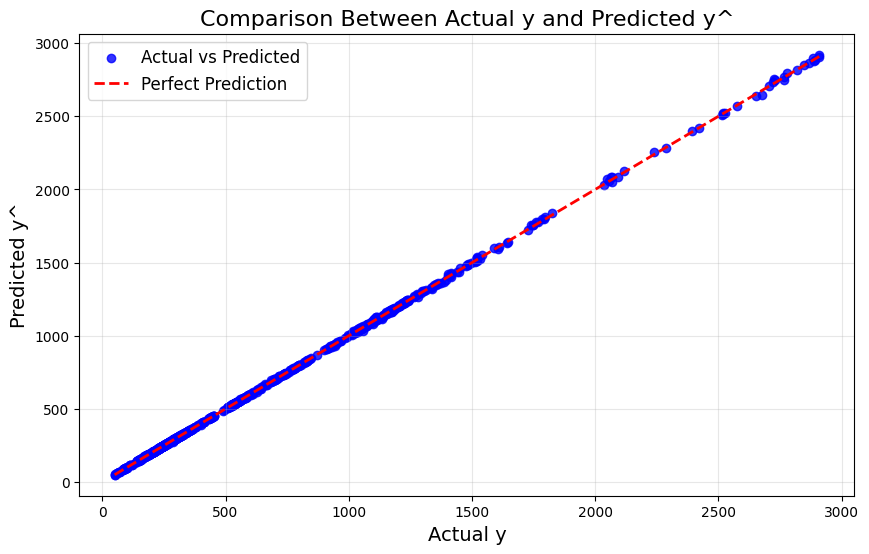

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted', alpha=0.8)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label='Perfect Prediction')
plt.title("Comparison Between Actual y and Predicted y^", fontsize=16)
plt.xlabel("Actual y", fontsize=14)
plt.ylabel("Predicted y^", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()


**9. Áp dụng mô hình vào thực tế**

In [ ]:
new_data = pd.DataFrame({
    "High": [52.0],
    "Low": [50.0],
    "Open": [51.0],
    "Volume": [5000000]
})

predicted_price = model.predict(new_data)
print(f"Adj Closed Predicted: {round(predicted_price[0],2)}")

Adj Closed Predicted: 50.96


### **Kết luận:**
Như vậy nếu hôm này cổ phiếu có thông tin:\
    "High": [52.0],\
    "Low": [50.0],\
    "Open": [51.0],\
    "Volume": [5000000]\
Thì rất có thể giá dự đoán đóng cửa hôm sau sẽ là: 50.96.